In [1]:
%matplotlib inline
import random
import torch
from torch.distributions.multinomial import Multinomial
from d2l import torch as d2l

In [6]:
num_tosses = 100
nheads = sum([random.random() > 0.5 for _ in range(num_tosses)])
ntails = num_tosses - nheads
print("heads, tails: ", [nheads, ntails])

heads, tails:  [44, 56]


In [11]:
fair_probs = torch.tensor([0.5, 0.5])
Multinomial(num_tosses, fair_probs).sample() / num_tosses

tensor([0.4900, 0.5100])

In [21]:
Multinomial(1, fair_probs).sample((10000,)).cumsum(dim=0)

tensor([[0.0000e+00, 1.0000e+00],
        [1.0000e+00, 1.0000e+00],
        [2.0000e+00, 1.0000e+00],
        ...,
        [4.9580e+03, 5.0400e+03],
        [4.9580e+03, 5.0410e+03],
        [4.9590e+03, 5.0410e+03]])

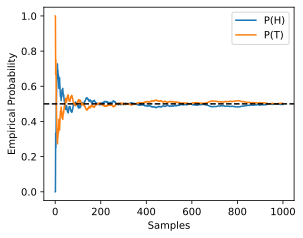

In [49]:
samples = Multinomial(1, fair_probs).sample((1000,))
cum_sums = samples.cumsum(dim=0)
estimates = (cum_sums / cum_sums.sum(dim=1, keepdims=True)).numpy()

d2l.set_figsize((4.5, 3.5))
d2l.plt.plot(estimates[:, 0], label=("P(H)"))
d2l.plt.plot(estimates[:, 1], label=("P(T)"))
d2l.plt.axhline(y=0.5, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Samples')
d2l.plt.gca().set_ylabel('Empirical Probability')
d2l.plt.legend();


In [55]:
print(dir(torch.distributions))

['AbsTransform', 'AffineTransform', 'Bernoulli', 'Beta', 'Binomial', 'CatTransform', 'Categorical', 'Cauchy', 'Chi2', 'ComposeTransform', 'ContinuousBernoulli', 'CorrCholeskyTransform', 'CumulativeDistributionTransform', 'Dirichlet', 'Distribution', 'ExpTransform', 'Exponential', 'ExponentialFamily', 'FisherSnedecor', 'Gamma', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'Independent', 'IndependentTransform', 'Kumaraswamy', 'LKJCholesky', 'Laplace', 'LogNormal', 'LogisticNormal', 'LowRankMultivariateNormal', 'LowerCholeskyTransform', 'MixtureSameFamily', 'Multinomial', 'MultivariateNormal', 'NegativeBinomial', 'Normal', 'OneHotCategorical', 'OneHotCategoricalStraightThrough', 'Pareto', 'Poisson', 'PositiveDefiniteTransform', 'PowerTransform', 'RelaxedBernoulli', 'RelaxedOneHotCategorical', 'ReshapeTransform', 'SigmoidTransform', 'SoftmaxTransform', 'SoftplusTransform', 'StackTransform', 'StickBreakingTransform', 'StudentT', 'TanhTransform', 'Transform', 'TransformedDistribution',